# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


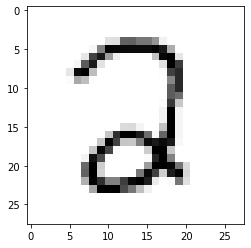

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2497930324569202
train accuracy is: 0.6387080620931397, test accuracy is 0.6461693548387096


Epoch 10 Loss 0.08644130676211617
train accuracy is: 0.9143715573360041, test accuracy is 0.922883064516129


Epoch 20 Loss 0.05454168748897877
train accuracy is: 0.9419963278250709, test accuracy is 0.9506048387096774


Epoch 30 Loss 0.042844372794559146
train accuracy is: 0.9535970622600568, test accuracy is 0.9581653225806451


Epoch 40 Loss 0.03694037397220632
train accuracy is: 0.9598564513436821, test accuracy is 0.9627016129032258


Epoch 50 Loss 0.03336470705252355
train accuracy is: 0.9634451677516275, test accuracy is 0.9652217741935484


Epoch 60 Loss 0.030909751732544344
train accuracy is: 0.9658654648639626, test accuracy is 0.9667338709677419


Epoch 70 Loss 0.02909580463446169
train accuracy is: 0.9672842597229178, test accuracy is 0.9657258064516129


Epoch 80 Loss 0.02766754825565605
train accuracy is: 0.9691203471874479, test accuracy is 0.9667338709677419


Epoch 90 Loss 0.026500572600114486
train accuracy is: 0.970372225004173, test accuracy is 0.9672379032258065


Epoch 100 Loss 0.025517075276919803
train accuracy is: 0.971039893173093, test accuracy is 0.967741935483871


Epoch 110 Loss 0.024665239002073715
train accuracy is: 0.9722083124687031, test accuracy is 0.967741935483871


Epoch 120 Loss 0.023907149107905843
train accuracy is: 0.9731263562009681, test accuracy is 0.9682459677419355


Epoch 130 Loss 0.023222232004737955
train accuracy is: 0.9740443999332332, test accuracy is 0.9682459677419355


Epoch 140 Loss 0.022598018811558575
train accuracy is: 0.9745451510599232, test accuracy is 0.9692540322580645


Epoch 150 Loss 0.02203167305119289
train accuracy is: 0.9754631947921882, test accuracy is 0.9702620967741935


Epoch 160 Loss 0.021500518942745905
train accuracy is: 0.9761308629611083, test accuracy is 0.9707661290322581


Epoch 170 Loss 0.0210040434132139
train accuracy is: 0.9766316140877984, test accuracy is 0.9712701612903226


Epoch 180 Loss 0.020537706416045912
train accuracy is: 0.9769654481722584, test accuracy is 0.9722782258064516


Epoch 190 Loss 0.02009168212769911
train accuracy is: 0.9778000333834085, test accuracy is 0.9722782258064516


Epoch 200 Loss 0.019670377995870462
train accuracy is: 0.9782173259889835, test accuracy is 0.9727822580645161


Epoch 210 Loss 0.01926221526472935
train accuracy is: 0.9793022867634785, test accuracy is 0.9727822580645161


Epoch 220 Loss 0.018870018849864945
train accuracy is: 0.9795526623268236, test accuracy is 0.9727822580645161


Epoch 230 Loss 0.018490781962268096
train accuracy is: 0.9798030378901685, test accuracy is 0.9732862903225806


Epoch 240 Loss 0.01811776638197744
train accuracy is: 0.9802203304957436, test accuracy is 0.9732862903225806


0.011271946071924322

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2427918230853947
train accuracy is: 0.699465865464864, test accuracy is 0.7162298387096774


Epoch 10 Loss 0.10400064776629006
train accuracy is: 0.9104490068435988, test accuracy is 0.920866935483871


Epoch 20 Loss 0.08005004225007956
train accuracy is: 0.9253046236020698, test accuracy is 0.9430443548387096


Epoch 30 Loss 0.06897103629937053
train accuracy is: 0.9355700216992154, test accuracy is 0.9526209677419355


Epoch 40 Loss 0.062297740052952376
train accuracy is: 0.9409948255716909, test accuracy is 0.9571572580645161


Epoch 50 Loss 0.05773988290559881
train accuracy is: 0.9439158738107161, test accuracy is 0.9581653225806451


Epoch 60 Loss 0.054387584136332934
train accuracy is: 0.9460023368385913, test accuracy is 0.9586693548387096


Epoch 70 Loss 0.05179320863546319
train accuracy is: 0.9483391754298114, test accuracy is 0.9596774193548387


Epoch 80 Loss 0.04971314414115722
train accuracy is: 0.9497579702887665, test accuracy is 0.9606854838709677


Epoch 90 Loss 0.04799624131569953
train accuracy is: 0.9514271407110666, test accuracy is 0.9621975806451613


Epoch 100 Loss 0.046549900652893605
train accuracy is: 0.9525121014855616, test accuracy is 0.9621975806451613


Epoch 110 Loss 0.045307137404001135
train accuracy is: 0.9530963111333667, test accuracy is 0.9632056451612904


Epoch 120 Loss 0.0442280383445084
train accuracy is: 0.9540978133867468, test accuracy is 0.9657258064516129


Epoch 130 Loss 0.04327625102138558
train accuracy is: 0.9547654815556669, test accuracy is 0.9657258064516129


Epoch 140 Loss 0.042429817890588556
train accuracy is: 0.9555166082457018, test accuracy is 0.9667338709677419


Epoch 150 Loss 0.0416702843705421
train accuracy is: 0.956601569020197, test accuracy is 0.9667338709677419


Epoch 160 Loss 0.04098268238007829
train accuracy is: 0.957519612752462, test accuracy is 0.9667338709677419


Epoch 170 Loss 0.040357416783817636
train accuracy is: 0.9583541979636121, test accuracy is 0.9667338709677419


Epoch 180 Loss 0.03978549159528422
train accuracy is: 0.9588549490903021, test accuracy is 0.9667338709677419


Epoch 190 Loss 0.03925882418582644
train accuracy is: 0.9591053246536472, test accuracy is 0.9667338709677419


Epoch 200 Loss 0.03877215630788597
train accuracy is: 0.9595226172592222, test accuracy is 0.9667338709677419


Epoch 210 Loss 0.038320129156411545
train accuracy is: 0.9600233683859122, test accuracy is 0.9672379032258065


Epoch 220 Loss 0.03789959021645944
train accuracy is: 0.9601068269070272, test accuracy is 0.9672379032258065


Epoch 230 Loss 0.037505757393158465
train accuracy is: 0.9604406609914873, test accuracy is 0.9672379032258065


Epoch 240 Loss 0.03713651904148615
train accuracy is: 0.9604406609914873, test accuracy is 0.967741935483871


0.05315607512026416

### Comparing results of NN and LR

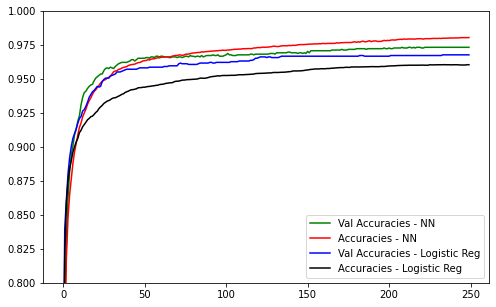

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

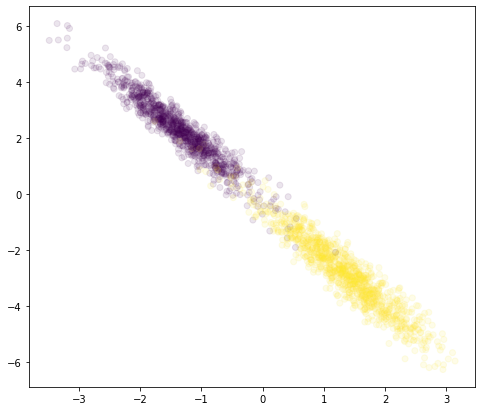

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

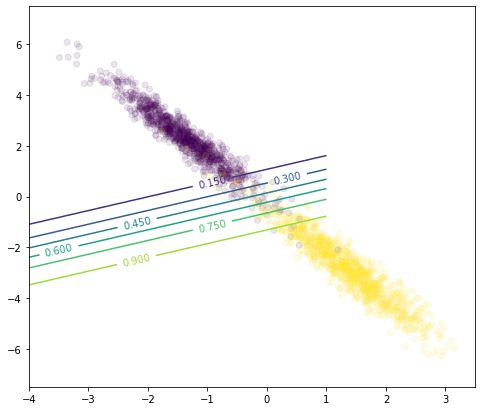

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );